In [1]:
# import all necessary things
%matplotlib nbagg

import qcodes as qc
import qcodes.instrument.parameter as parameter
import qcodes.instrument_drivers.AlazarTech.ATS9360 as ATSdriver
import qcodes.instrument_drivers.AlazarTech.ATS_acquisition_controllers as ats_contr

qc.halt_bg()
qc.set_mp_method('spawn')  # force Windows behavior on mac

# this makes a widget in the corner of the window to show and control
# subprocesses and any output they would print to the terminal
#qc.show_subprocess_widget()

<IPython.core.display.Javascript object>

No loop running


a:\qcodes\qcodes\process\helpers.py:27: UserWarning: Multiprocessing is in beta, use at own risk
  warnings.warn("Multiprocessing is in beta, use at own risk", UserWarning)


In [2]:
# Command to list all alazar boards connected to the system
ATSdriver.AlazarTech_ATS.find_boards()

[{'bits_per_sample': 12,
  'board_id': 1,
  'board_kind': 'ATS9360',
  'max_samples': 4294967294,
  'system_id': 1}]

In [3]:
# Create the ATS9870 instrument on the new server "alazar_server"
ats_inst = ATSdriver.AlazarTech_ATS9360(name='Alazar1', server_name="alazar_server")
# Print all information about this Alazar card
ats_inst.get_idn()

a:\qcodes\qcodes\instrument\metaclass.py:37: UserWarning: Multiprocessing is in beta, use at own risk
  UserWarning)


{'CPLD_version': '25.16',
 'SDK_version': '5.9.25',
 'asopc_type': '1712554848',
 'driver_version': '5.9.25',
 'firmware': None,
 'latest_cal_date': '13-11-15',
 'memory_size': '4294967294',
 'model': 'ATS9360',
 'pcie_link_speed': '0.5GB/s',
 'pcie_link_width': '8',
 'serial': '970344',
 'vendor': 'AlazarTech'}

In [4]:
import qcodes.instrument_drivers.rohde_schwarz.SGS100A as RSdriver

In [5]:
localos = RSdriver.RohdeSchwarz_SGS100A('LO', 'TCPIP0::172.20.3.42::inst0::INSTR')

Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/103076, firmware:3.1.19.7-3.20.140.60.1) in 0.05s


In [6]:
localos.frequency()

10000000.0

In [7]:
localos.power(-25)
localos.frequency(10e6)
localos.status('on')

In [8]:
# Instantiate an acquisition controller (In this case we are doing a simple DFT) on the same server ("alazar_server") and 
# provide the name of the name of the alazar card that this controller should control
acquisition_controller = ats_contr.Demodulation_AcquisitionController(name='acquisition_controller', 
                                                                      demodulation_frequency=15e6, 
                                                                      alazar_name='Alazar1', 
                                                                      server_name="alazar_server")

a:\qcodes\qcodes\instrument\metaclass.py:37: UserWarning: Multiprocessing is in beta, use at own risk
  UserWarning)


In [11]:
# Configure all settings in the Alazar card
ats_inst.config(#clock_source='INTERNAL_CLOCK',
                sample_rate='100000000',
                #clock_edge='CLOCK_EDGE_RISING',
                #decimation=0,
                #coupling=['AC','AC'],
                channel_range=[2.,2.],
                #impedance=[50,50],
                #bwlimit=['DISABLED','DISABLED'],
                #trigger_operation='TRIG_ENGINE_OP_J',
                #trigger_engine1='TRIG_ENGINE_J',
                trigger_source1='EXTERNAL',
                #trigger_slope1='TRIG_SLOPE_POSITIVE',
                #trigger_level1=128,
                #trigger_engine2='TRIG_ENGINE_K',
                #trigger_source2='DISABLE',
                #trigger_slope2='TRIG_SLOPE_POSITIVE',
                #trigger_level2=128,
                #external_trigger_coupling='AC',
                #external_trigger_range='ETR_5V',
                #trigger_delay=0,
                #timeout_ticks=0
)

ValueError: *** error on alazar_server ***
while executing query: ('ASK', 'cmd', (0, 'config'), {'trigger_source1': 'EXTERNAL', 'channel_range': [2.0, 2.0], 'sample_rate': 100000000})

(<bound method InstrumentServer.handle_cmd of <qcodes.instrument.server.InstrumentServer object at 0x0000000004920978>>, (0, 'config'), {'sample_rate': 100000000, 'trigger_source1': 'EXTERNAL', 'channel_range': [2.0, 2.0]})
Traceback (most recent call last):
  File "a:\qcodes\qcodes\process\server.py", line 347, in _process_ask
    response = func(*args, **kwargs)
  File "a:\qcodes\qcodes\instrument\server.py", line 189, in handle_cmd
    return func(*args, **kwargs)
  File "a:\qcodes\qcodes\instrument_drivers\AlazarTech\ATS.py", line 364, in config
    self._set_if_present('sample_rate', sample_rate)
  File "a:\qcodes\qcodes\instrument_drivers\AlazarTech\ATS.py", line 698, in _set_if_present
    self.parameters[param_name]._set(value)
  File "a:\qcodes\qcodes\instrument_drivers\AlazarTech\ATS.py", line 883, in _set
    self.validate(value)
  File "a:\qcodes\qcodes\instrument\parameter.py", line 365, in validate
    self._vals.validate(value, 'Parameter: ' + context)
  File "a:\qcodes\qcodes\utils\validators.py", line 234, in validate
    repr(value), repr(self._values), context))
ValueError: 100000000 is not in {'5KSPS', '100MSPS', '1000MSPS', '50MSPS', '500MSPS', '10MSPS', '1KSPS', '2KSPS', '100KSPS', '50KSPS', '800MSPS', '500KSPS', '1MSPS', '5MSPS', '20MSPS', '200KSPS', '1500MSPS', '2MSPS', 'EXTERNAL_CLOCK', '250MSPS', '1200MSPS', '20KSPS', '10KSPS', '125MSPS', '1800MSPS', '10MHZ_REF_500MSPS'}; Parameter: sample_rate


In [11]:
# This command is specific to this acquisition controller. The kwargs provided here are being forwarded to ats_inst.acquire
# This way, it becomes easy to change acquisition specific settings from the ipython notebook
acquisition_controller.update_acquisitionkwargs(#mode='NPT',
                 samples_per_record=1024,
                 records_per_buffer=70,
                 buffers_per_acquisition=1,
                 #channel_selection='AB',
                 #transfer_offset=0,
                 #external_startcapture='ENABLED',
                 #enable_record_headers='DISABLED',
                 #alloc_buffers='DISABLED',
                 #fifo_only_streaming='DISABLED',
                 #interleave_samples='DISABLED',
                 #get_processed_data='DISABLED',
                 allocated_buffers=1,
                 #buffer_timeout=1000
)

In [12]:
# Getting the value of the parameter 'acquisition' of the instrument 'acquisition_controller' performes the entire acquisition 
# protocol. This again depends on the specific implementation of the acquisition controller
acquisition_controller.acquisition()

2.0976760253919644

In [13]:
# make a snapshot of the 'ats_inst' instrument
ats_inst.snapshot()

{'__class__': 'qcodes.instrument_drivers.AlazarTech.ATS9360.AlazarTech_ATS9360',
 'functions': {},
 'name': 'Alazar1',
 'parameters': {'IDN': {'__class__': 'qcodes.instrument.parameter.StandardParameter',
   'instrument': 'qcodes.instrument_drivers.AlazarTech.ATS9360.AlazarTech_ATS9360',
   'instrument_name': 'Alazar1',
   'label': 'IDN',
   'name': 'IDN',
   'ts': '2016-11-01 16:48:58',
   'units': '',
   'value': {'CPLD_version': '25.16',
    'SDK_version': '5.9.25',
    'asopc_type': '1712554848',
    'driver_version': '5.9.25',
    'firmware': None,
    'latest_cal_date': '13-11-15',
    'memory_size': '4294967294',
    'model': 'ATS9360',
    'pcie_link_speed': '0.5GB/s',
    'pcie_link_width': '8',
    'serial': '970344',
    'vendor': 'AlazarTech'}},
  'alloc_buffers': {'__class__': 'qcodes.instrument_drivers.AlazarTech.ATS.AlazarParameter',
   'label': 'Alloc Buffers',
   'name': 'alloc_buffers',
   'ts': '2016-11-01 16:48:23',
   'units': '',
   'value': 'DISABLED'},
  'alloca

False
None
started at 2016-11-01 16:49:46


<IPython.core.display.Javascript object>


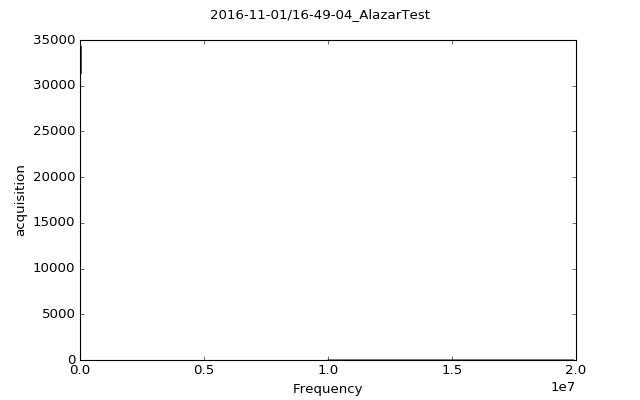

In [14]:
# Finally show that this instrument also works within a loop
#dummy = parameter.ManualParameter(name="dummy")
data = qc.Loop(localos.frequency[10e6:20e6:0.1e6]).each(
    acquisition_controller.acquisition).run(name='AlazarTest')
qc.MatPlot(data.acquisition_controller_acquisition)

In [16]:
data

DataSet:
   mode     = DataMode.LOCAL
   location = '2016-11-01/16-49-04_AlazarTest'
   <Type>   | <array_id>                         | <array.name> | <array.shape>
   Setpoint | LO_frequency_set                   | frequency    | (100,)
   Measured | acquisition_controller_acquisition | acquisition  | (100,)

In [13]:
# Instantiate an acquisition controller (In this case we are doing a simple DFT) on the same server ("alazar_server") and 
# provide the name of the name of the alazar card that this controller should control
import qcodes.instrument_drivers.AlazarTech.basic_controller as basic_contr

basic_acquisition_controller = basic_contr.Basic_Acquisition_Controller(name='basic_acquisition_controller', 
                                                                      alazar_name='Alazar1', 
                                                                      server_name="alazar_server")

a:\qcodes\qcodes\instrument\metaclass.py:37: UserWarning: Multiprocessing is in beta, use at own risk
  UserWarning)


In [14]:
# This command is specific to this acquisition controller. The kwargs provided here are being forwarded to ats_inst.acquire
# This way, it becomes easy to change acquisition specific settings from the ipython notebook
basic_acquisition_controller.update_acquisitionkwargs(#mode='NPT',
                 samples_per_record=1024,
                 records_per_buffer=1,
                 buffers_per_acquisition=1,
                 #channel_selection='AB',
                 #transfer_offset=0,
                 #external_startcapture='ENABLED',
                 #enable_record_headers='DISABLED',
                 #alloc_buffers='DISABLED',
                 #fifo_only_streaming='DISABLED',
                 #interleave_samples='DISABLED',
                 #get_processed_data='DISABLED',
                 allocated_buffers=1,
                 #buffer_timeout=1000
)

In [19]:
data2 = basic_acquisition_controller.acquisition()

In [16]:
import numpy as np
np.shape(data2)

(2, 1024)

In [17]:
import matplotlib.pyplot as plt


<IPython.core.display.Javascript object>


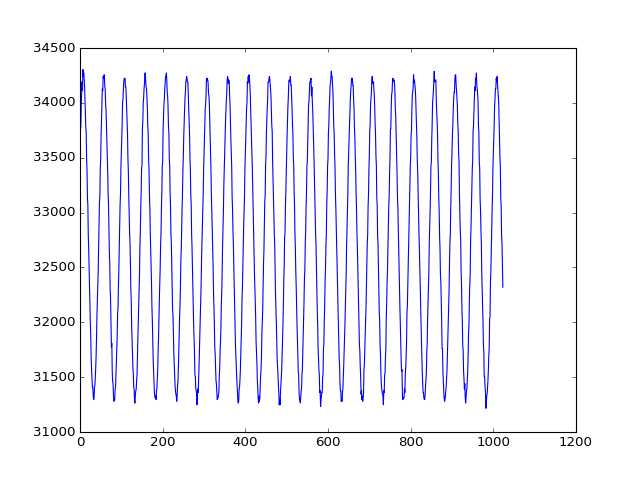

In [20]:
plt.figure()
plt.plot(data2[0])
plt.show()

In [25]:
data = qc.Loop(localos.frequency.sweep(1e6, 5e6, 1e6)).each(
    basic_acquisition_controller.acquisition).run(name='AlazarTest')

DataSet:
   mode     = DataMode.LOCAL
   location = '2016-11-02/14-12-03_AlazarTest'
   <Type>   | <array_id>                               | <array.name> | <array.shape>
   Setpoint | LO_frequency_set                         | frequency    | (5,)
   Measured | basic_acquisition_controller_acquisition | acquisition  | (5,)
started at 2016-11-02 14:12:03


ValueError: setting an array element with a sequence.

In [10]:
# Configure all settings in the Alazar card
ats_inst.config(clock_source='EXTERNAL_CLOCK_10MHz_REF',
                sample_rate='10MHZ_REF_500MSPS',
                clock_edge='CLOCK_EDGE_RISING',
                decimation=1,
                coupling=['DC','DC'],
                channel_range=[.4,.4],
                #impedance=[50,50],
                #trigger_operation='TRIG_ENGINE_OP_J',
                #trigger_engine1='TRIG_ENGINE_J',
                #trigger_source1='EXTERNAL',
                #trigger_slope1='TRIG_SLOPE_POSITIVE',
                trigger_level1=140,
                #trigger_engine2='TRIG_ENGINE_K',
                #trigger_source2='DISABLE',
                #trigger_slope2='TRIG_SLOPE_POSITIVE',
                #trigger_level2=128,
                external_trigger_coupling='DC',
                external_trigger_range='ETR_2V5',
                #trigger_delay=0,
                #timeout_ticks=0
)


In [9]:
ats_inst.sample_rate()

'10MHZ_REF_500MSPS'

In [10]:
data3 = basic_acquisition_controller.acquisition()

<IPython.core.display.Javascript object>


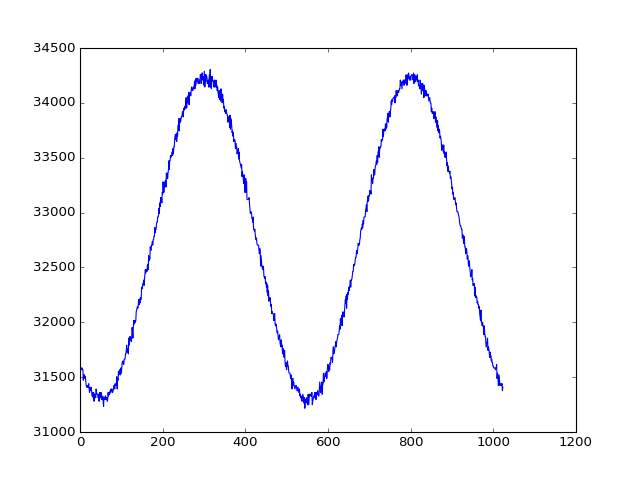

In [16]:
plt.figure()
plt.plot(data3[0])
plt.show()